# Statistical Learning Assignment

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## The Dataset - Koi Data

In [2]:
data = pd.read_csv('koi_data.csv')
data.head(3)

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276


In [3]:
X = data.drop(['koi_disposition','kepoi_name'], axis=1).values
y_raw = data[['koi_disposition']].values
X[0],y_raw[0]

(array([ 9.488040e+00,  1.460000e-01,  2.957500e+00,  6.158000e+02,
         2.234000e-02,  3.207960e+00,  2.260000e+00,  8.530000e-02,
         8.966000e+01,  7.930000e+02,  9.359000e+01,  2.481000e+01,
         5.135850e+00,  2.847082e+01,  3.580000e+01,  5.455000e+03,
         4.467000e+00,  1.400000e-01,  9.270000e-01,  9.190000e-01,
         1.534700e+01,  1.589000e+01,  1.527000e+01,  1.511400e+01,
         1.500600e+01,  1.408200e+01,  1.375100e+01,  1.364800e+01,
         2.000000e-03,  1.946229e+01,  4.814191e+01,  4.300000e-01,
         9.400000e-01, -2.000000e-04, -5.500000e-04, -1.000000e-02,
         2.000000e-01,  2.000000e-01,  8.000000e-02,  3.100000e-01,
         3.200000e-01]), array(['CONFIRMED'], dtype=object))

In [4]:
y = [1 if a=='CONFIRMED' else 0 for a in y_raw]
y[0:6]

[1, 1, 0, 1, 0, 1]

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled[0]

array([-3.11552502e-01, -2.17319544e-01, -3.80571490e-01, -3.09397977e-01,
       -8.23154215e-02, -8.25381058e-03, -2.97263067e-02, -3.01305357e-01,
        5.19926794e-01, -4.52126601e-01, -9.73820708e-02, -1.36055965e-01,
       -2.24935695e-01, -2.52254091e-01, -3.13654259e-01, -3.09824353e-01,
        3.50917519e-01,  9.29173103e-01, -1.60045387e-01, -2.72078747e-01,
        7.81871455e-01,  6.98268274e-01,  7.55438145e-01,  8.15252487e-01,
        8.25355981e-01,  8.51589183e-01,  9.04054732e-01,  8.77675763e-01,
       -5.06216035e-01, -2.98603423e-02,  1.18445742e+00,  7.15711889e-02,
        1.18427597e-01,  9.61883141e-04, -1.27561093e-02,  1.61201626e-02,
        1.04655808e-01, -5.49766026e-01,  4.80361878e-02,  1.49476110e-01,
       -5.09226942e-01])

In [5]:
def generate_folds(X,y,k):
    data_index = np.array((range(0,len(X))))
    np.random.shuffle(data_index)
    fold_index = np.array_split(data_index,k)

    folds = []
    for fi in fold_index:
        fold_x = np.array([X[i] for i in fi])
        fold_y = np.array([y[i] for i in fi])
        folds.append((fold_x,fold_y))
        
    return folds

def flatten_folds(folds):
    X = np.concatenate([x for x,_ in folds],axis=0)
    y = np.concatenate([x for _,x in folds],axis=0)
        
    return X,y

def k_fold_evaluate(model,folds):
    from sklearn.metrics import accuracy_score
    
    mean_acc = 0
    for fold in range(0,k):
        train_folds = folds[0:fold] + folds[fold+1:k]
        test_fold = folds[fold]

        X_train,y_train = flatten_folds(train_folds)
        X_test,y_test = test_fold[0],test_fold[1]

        y_pred = model.fit(X_train,y_train).predict(X_test)
        mean_acc += accuracy_score(y_test, y_pred)

    return mean_acc / k

In [9]:
k=5

folds = generate_folds(X_scaled,y,k)
folds[0]

(array([[-4.03799277e-01, -2.59159415e-02, -2.55534956e-01, ...,
         -2.03499678e-01,  2.63259073e+00,  1.64831712e+00],
        [-3.52497995e-01,  3.19237156e-02, -2.12932043e-01, ...,
         -5.33895645e-02,  9.09638366e-02, -5.41049125e-01],
        [-3.73958362e-01,  2.20300901e-02, -5.44821090e-01, ...,
         -6.48173339e-04,  6.17076997e-02, -5.82417964e-01],
        ...,
        [-3.76762359e-01,  3.15431915e-02,  5.67364876e-01, ...,
         -1.60723209e+00, -6.58724671e-01,  7.98664813e-01],
        [ 1.16978441e+01, -1.90682859e-01,  1.51844691e+00, ...,
          9.67205489e-02,  2.05428472e-01, -4.50674123e-01],
        [-3.68112609e-01, -7.04372565e-02, -3.92565230e-01, ...,
          1.15229169e-02,  9.82778708e-02, -5.56960217e-01]]),
 array([0, 1, 1, ..., 0, 1, 1]))

## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

mean_acc = k_fold_evaluate(gnb,folds)

print("Mean accuracy: ",mean_acc)

Mean accuracy:  0.9165728219906895


## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

mean_acc = k_fold_evaluate(dtc,folds)

print("Mean accuracy: ",mean_acc)

Mean accuracy:  0.9419467228256853


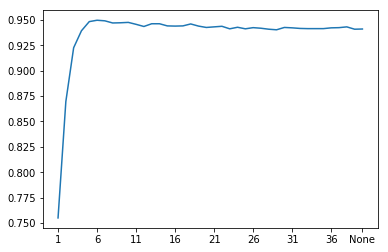

In [27]:
tree_size =  list(range(1,40)) + [None]
results = [ ]
for s in tree_size:
    dtc = DecisionTreeClassifier(max_depth = s)
    results.append(k_fold_evaluate(dtc,folds))
    
plt.plot([str(x) for x in range(1,40)]+["None"],results)
plt.xticks([str(x) for x in range(0,40,5)]+["None"])
plt.show()

## Support Vector Machines

In [11]:
from sklearn.svm import SVC

svc = SVC()

mean_acc = k_fold_evaluate(svc,folds)

print("Mean accuracy: ",mean_acc)

Mean accuracy:  0.9356013079139881


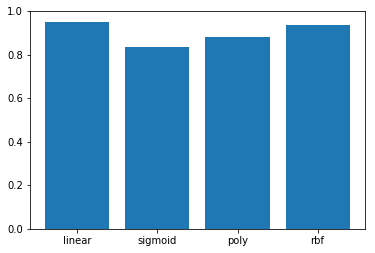

In [34]:
kernels = ['linear','sigmoid','poly','rbf']
results = [ ]
for kr in kernels:
    svc = SVC(kernel = kr)
    results.append(k_fold_evaluate(svc,folds))
    
plt.bar(kernels,results)
plt.show()

## KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

mean_acc = k_fold_evaluate(knn,folds)

print("Mean accuracy: ",mean_acc)

Mean accuracy:  0.893504027192788


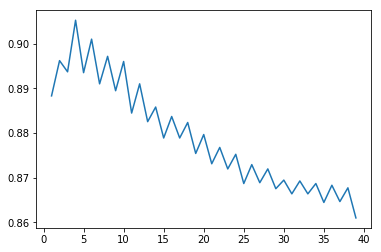

In [38]:
n_neigh =  list(range(1,40))
results = [ ]
for n in n_neigh:
    knn = KNeighborsClassifier(n_neighbors=n)
    results.append(k_fold_evaluate(knn,folds))
    
plt.plot(n_neigh,results)
plt.show()

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier()

mean_acc = k_fold_evaluate(rfc,folds)

print("Mean accuracy: ",mean_acc)

Mean accuracy:  0.9609759476834405


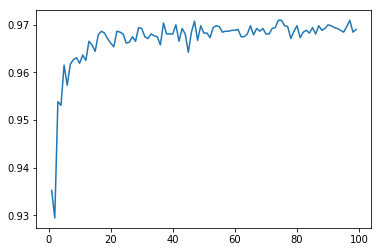

In [44]:
n_trees =  list(range(1,100))
results = [ ]
for s in n_trees:
    rfc = RandomForestClassifier(n_estimators = s)
    results.append(k_fold_evaluate(rfc,folds))
    
plt.plot(n_trees,results)
plt.show()

## Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

mean_acc = k_fold_evaluate(gbc,folds)

print("Mean accuracy: ",mean_acc)

Mean accuracy:  0.9707784674499372


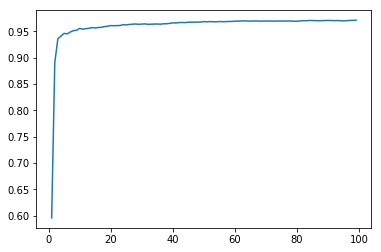

In [45]:
n_trees =  list(range(1,100))
results = [ ]
for s in n_trees:
    gbc = GradientBoostingClassifier(n_estimators = s)
    results.append(k_fold_evaluate(gbc,folds))
    
plt.plot(n_trees,results)
plt.show()

## Results

## Conclusion